In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
# converting json to pandas DataFrame
with open('data/data-json/jobs.json') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df

,name,priceValue,priceCurrency,viewsToday,viewsAll,category,subcategory,link
0,Вызов ветеринарного врача на дом,100,lei,2,175,animals-and-plants,care,https://999.md/ro/57801338
1,Стрижка кошек! Купание,200,lei,2,532,animals-and-plants,care,https://999.md/ro/60322770
2,Fintini sapam curățim adincim sapam și fintini...,10,lei,2,480,agriculture,services,https://999.md/ro/59026964
3,Очистка и уборка территорий. Curatarea terenu...,100,lei,2,653,agriculture,services,https://999.md/ro/69884401
4,Ремонт чистка Кишинёв мун и Углубление колодцев,90,€,2,297,agriculture,services,https://999.md/ro/57554529
...,...,...,...,...,...,...,...,...
20242,"Buletin romanesc, pasaport romanesc la cele ma...",20,€,4,2614,business,legal-services,https://999.md/ro/58316557
20243,Buletin roman rapid si ieftin! Pasaport roman!...,30,€,3,6660,business,legal-services,https://999.md/ro/42353437
20244,Buletin Roman la urgentă !!!,20,€,2,1930,business,legal-services,https://999.md/ro/58318919
20245,"Transcrierea certificatelor de naștere, căsăto...",40,€,2,4364,business,legal-services,https://999.md/ro/42118884


In [4]:
# droping the 'link' column
df2 = df.drop('link', axis = 'columns')
df2

,name,priceValue,priceCurrency,viewsToday,viewsAll,category,subcategory
0,Вызов ветеринарного врача на дом,100,lei,2,175,animals-and-plants,care
1,Стрижка кошек! Купание,200,lei,2,532,animals-and-plants,care
2,Fintini sapam curățim adincim sapam și fintini...,10,lei,2,480,agriculture,services
3,Очистка и уборка территорий. Curatarea terenu...,100,lei,2,653,agriculture,services
4,Ремонт чистка Кишинёв мун и Углубление колодцев,90,€,2,297,agriculture,services
...,...,...,...,...,...,...,...
20242,"Buletin romanesc, pasaport romanesc la cele ma...",20,€,4,2614,business,legal-services
20243,Buletin roman rapid si ieftin! Pasaport roman!...,30,€,3,6660,business,legal-services
20244,Buletin Roman la urgentă !!!,20,€,2,1930,business,legal-services
20245,"Transcrierea certificatelor de naștere, căsăto...",40,€,2,4364,business,legal-services


In [5]:
df2['priceCurrency'].value_counts()

lei    11106
€       8915
leu      149
$         77
Name: priceCurrency, dtype: int64

In [6]:
# Change "leu" to "lei"
df2['priceCurrency'] = df2['priceCurrency'].replace(['leu'],'lei')
df2['priceCurrency'].value_counts()

lei    11255
€       8915
$         77
Name: priceCurrency, dtype: int64

In [7]:
for i in range(0, 20247):
    if df2['priceCurrency'][i] == '€':
        df2['priceValue'][i] = df2['priceValue'][i]*21
        
df2

C:\Users\user\AppData\Local\Temp/ipykernel_10220/3998554610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['priceValue'][i] = df2['priceValue'][i]*21


,name,priceValue,priceCurrency,viewsToday,viewsAll,category,subcategory
0,Вызов ветеринарного врача на дом,100,lei,2,175,animals-and-plants,care
1,Стрижка кошек! Купание,200,lei,2,532,animals-and-plants,care
2,Fintini sapam curățim adincim sapam și fintini...,10,lei,2,480,agriculture,services
3,Очистка и уборка территорий. Curatarea terenu...,100,lei,2,653,agriculture,services
4,Ремонт чистка Кишинёв мун и Углубление колодцев,1890,€,2,297,agriculture,services
...,...,...,...,...,...,...,...
20242,"Buletin romanesc, pasaport romanesc la cele ma...",420,€,4,2614,business,legal-services
20243,Buletin roman rapid si ieftin! Pasaport roman!...,630,€,3,6660,business,legal-services
20244,Buletin Roman la urgentă !!!,420,€,2,1930,business,legal-services
20245,"Transcrierea certificatelor de naștere, căsăto...",840,€,2,4364,business,legal-services


In [8]:
for i in range(0, 20247):
    if df2['priceCurrency'][i] == '$':
        df2['priceValue'][i] = df2['priceValue'][i]*19

df2['priceCurrency'] = df2['priceCurrency'].replace(['€'],'lei')
df2['priceCurrency'] = df2['priceCurrency'].replace(['$'],'lei')
df2

C:\Users\user\AppData\Local\Temp/ipykernel_10220/2138499753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['priceValue'][i] = df2['priceValue'][i]*19


,name,priceValue,priceCurrency,viewsToday,viewsAll,category,subcategory
0,Вызов ветеринарного врача на дом,100,lei,2,175,animals-and-plants,care
1,Стрижка кошек! Купание,200,lei,2,532,animals-and-plants,care
2,Fintini sapam curățim adincim sapam și fintini...,10,lei,2,480,agriculture,services
3,Очистка и уборка территорий. Curatarea terenu...,100,lei,2,653,agriculture,services
4,Ремонт чистка Кишинёв мун и Углубление колодцев,1890,lei,2,297,agriculture,services
...,...,...,...,...,...,...,...
20242,"Buletin romanesc, pasaport romanesc la cele ma...",420,lei,4,2614,business,legal-services
20243,Buletin roman rapid si ieftin! Pasaport roman!...,630,lei,3,6660,business,legal-services
20244,Buletin Roman la urgentă !!!,420,lei,2,1930,business,legal-services
20245,"Transcrierea certificatelor de naștere, căsăto...",840,lei,2,4364,business,legal-services


In [9]:
#checking for missing values
df2.isnull().sum()

name             0
priceValue       0
priceCurrency    0
viewsToday       0
viewsAll         0
category         0
subcategory      0
dtype: int64

<AxesSubplot:>

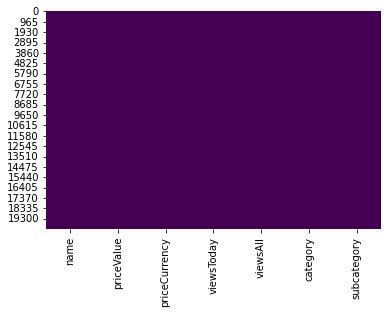

In [10]:
# visualising missing values cause it looks cool even if we know there is no missing values
sns.heatmap(df2.isnull(),cbar=False,cmap='viridis')

In [11]:
# What categories do we have and how many?  (19 categories)
# counting occurencies among the category column
df2['category'].value_counts()

transport                            9921
construction-and-repair              3803
business                             2370
all-for-celebrations                  882
computers-and-office-equipment        571
all-else                              498
all-for-home-and-office               457
audio-video-photo                     371
household-appliances                  366
phone-and-communication               267
agriculture                           194
furniture-and-interior                182
sports-health-and-beauty              110
services                               71
clothes-and-shoes                      51
tourism-leisure-and-entertainment      49
animals-and-plants                     42
children-world                         41
real-estate                             1
Name: category, dtype: int64

<AxesSubplot:>

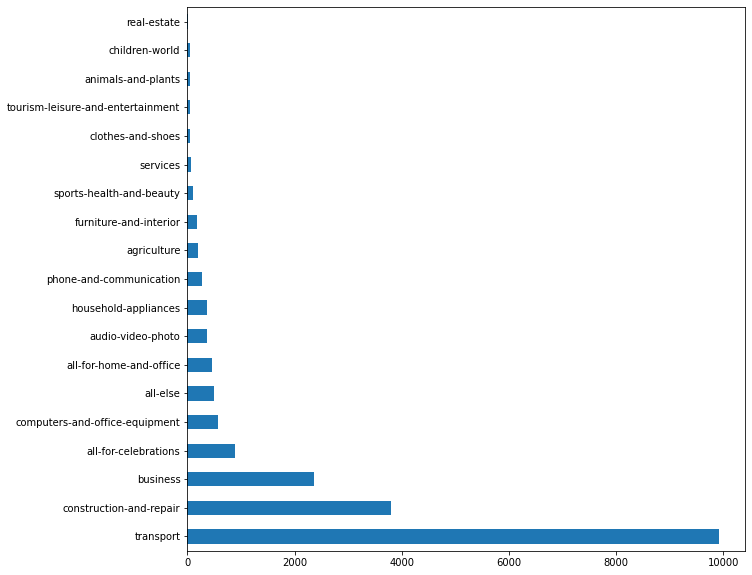

In [12]:
# What category is leading?
# visualising that data

df2['category'].value_counts().plot.barh(figsize=(10,10))

In [13]:
# What subcategories do we have and how many?  47 subcategories
df2['subcategory'].value_counts()

cargo                                   4279
rent-a-car                              3230
repairs                                 1691
leasing                                 1559
passenger                               1438
construction-work                       1054
car-2                                    974
construction-equipment                   768
computer-services                        571
photo-video-services                     516
cleaning-services                        457
security-and-safety                      456
repair                                   371
appliance-repair                         366
dev-support-sites                        317
advertising-services-and-development     310
musicians                                281
service-and-repair-of-telephones         267
plumbing                                 251
services                                 195
custom-furniture                         182
legal-services                           135
massage   

<AxesSubplot:>

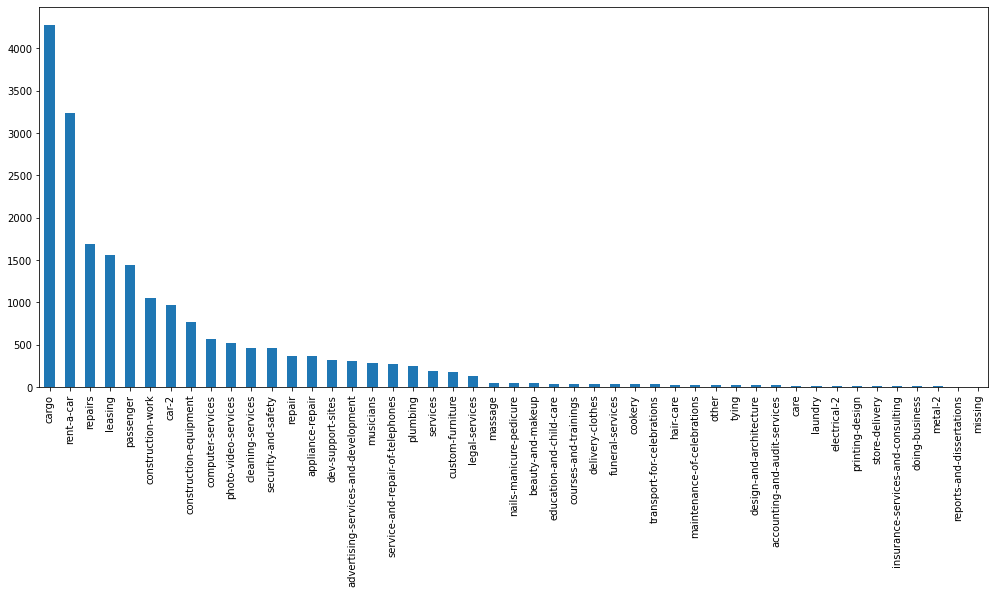

In [14]:
# What subcategory is leading?
df2['subcategory'].value_counts().plot.bar(figsize=(17,7))

In [15]:
category1 = df2['category'] == 'transport'
df2[category1]['priceValue'].mean()

2043.2482612639856

In [16]:
df2[category1]['priceValue'].median()

250.0

In [17]:
all_categories = df2['category'].unique()
all_categories

array(['animals-and-plants', 'agriculture', 'services',
       'all-for-celebrations', 'transport', 'all-else', 'children-world',
       'household-appliances', 'construction-and-repair',
       'computers-and-office-equipment', 'business',
       'sports-health-and-beauty', 'phone-and-communication',
       'all-for-home-and-office', 'tourism-leisure-and-entertainment',
       'clothes-and-shoes', 'audio-video-photo', 'furniture-and-interior',
       'real-estate'], dtype=object)

In [18]:
data = {}
for i in range(0, 19):
    c = df2['category'] == all_categories[i]
    x = df2[c]['priceValue'].median()
    data[all_categories[i]] = x
    
data    

{'animals-and-plants': 550.0,
 'agriculture': 150.0,
 'services': 900.0,
 'all-for-celebrations': 1375.0,
 'transport': 250.0,
 'all-else': 200.0,
 'children-world': 100.0,
 'household-appliances': 150.0,
 'construction-and-repair': 180.0,
 'computers-and-office-equipment': 150.0,
 'business': 63000.0,
 'sports-health-and-beauty': 200.0,
 'phone-and-communication': 200.0,
 'all-for-home-and-office': 100.0,
 'tourism-leisure-and-entertainment': 300.0,
 'clothes-and-shoes': 1290.0,
 'audio-video-photo': 150.0,
 'furniture-and-interior': 950.0,
 'real-estate': 147.0}

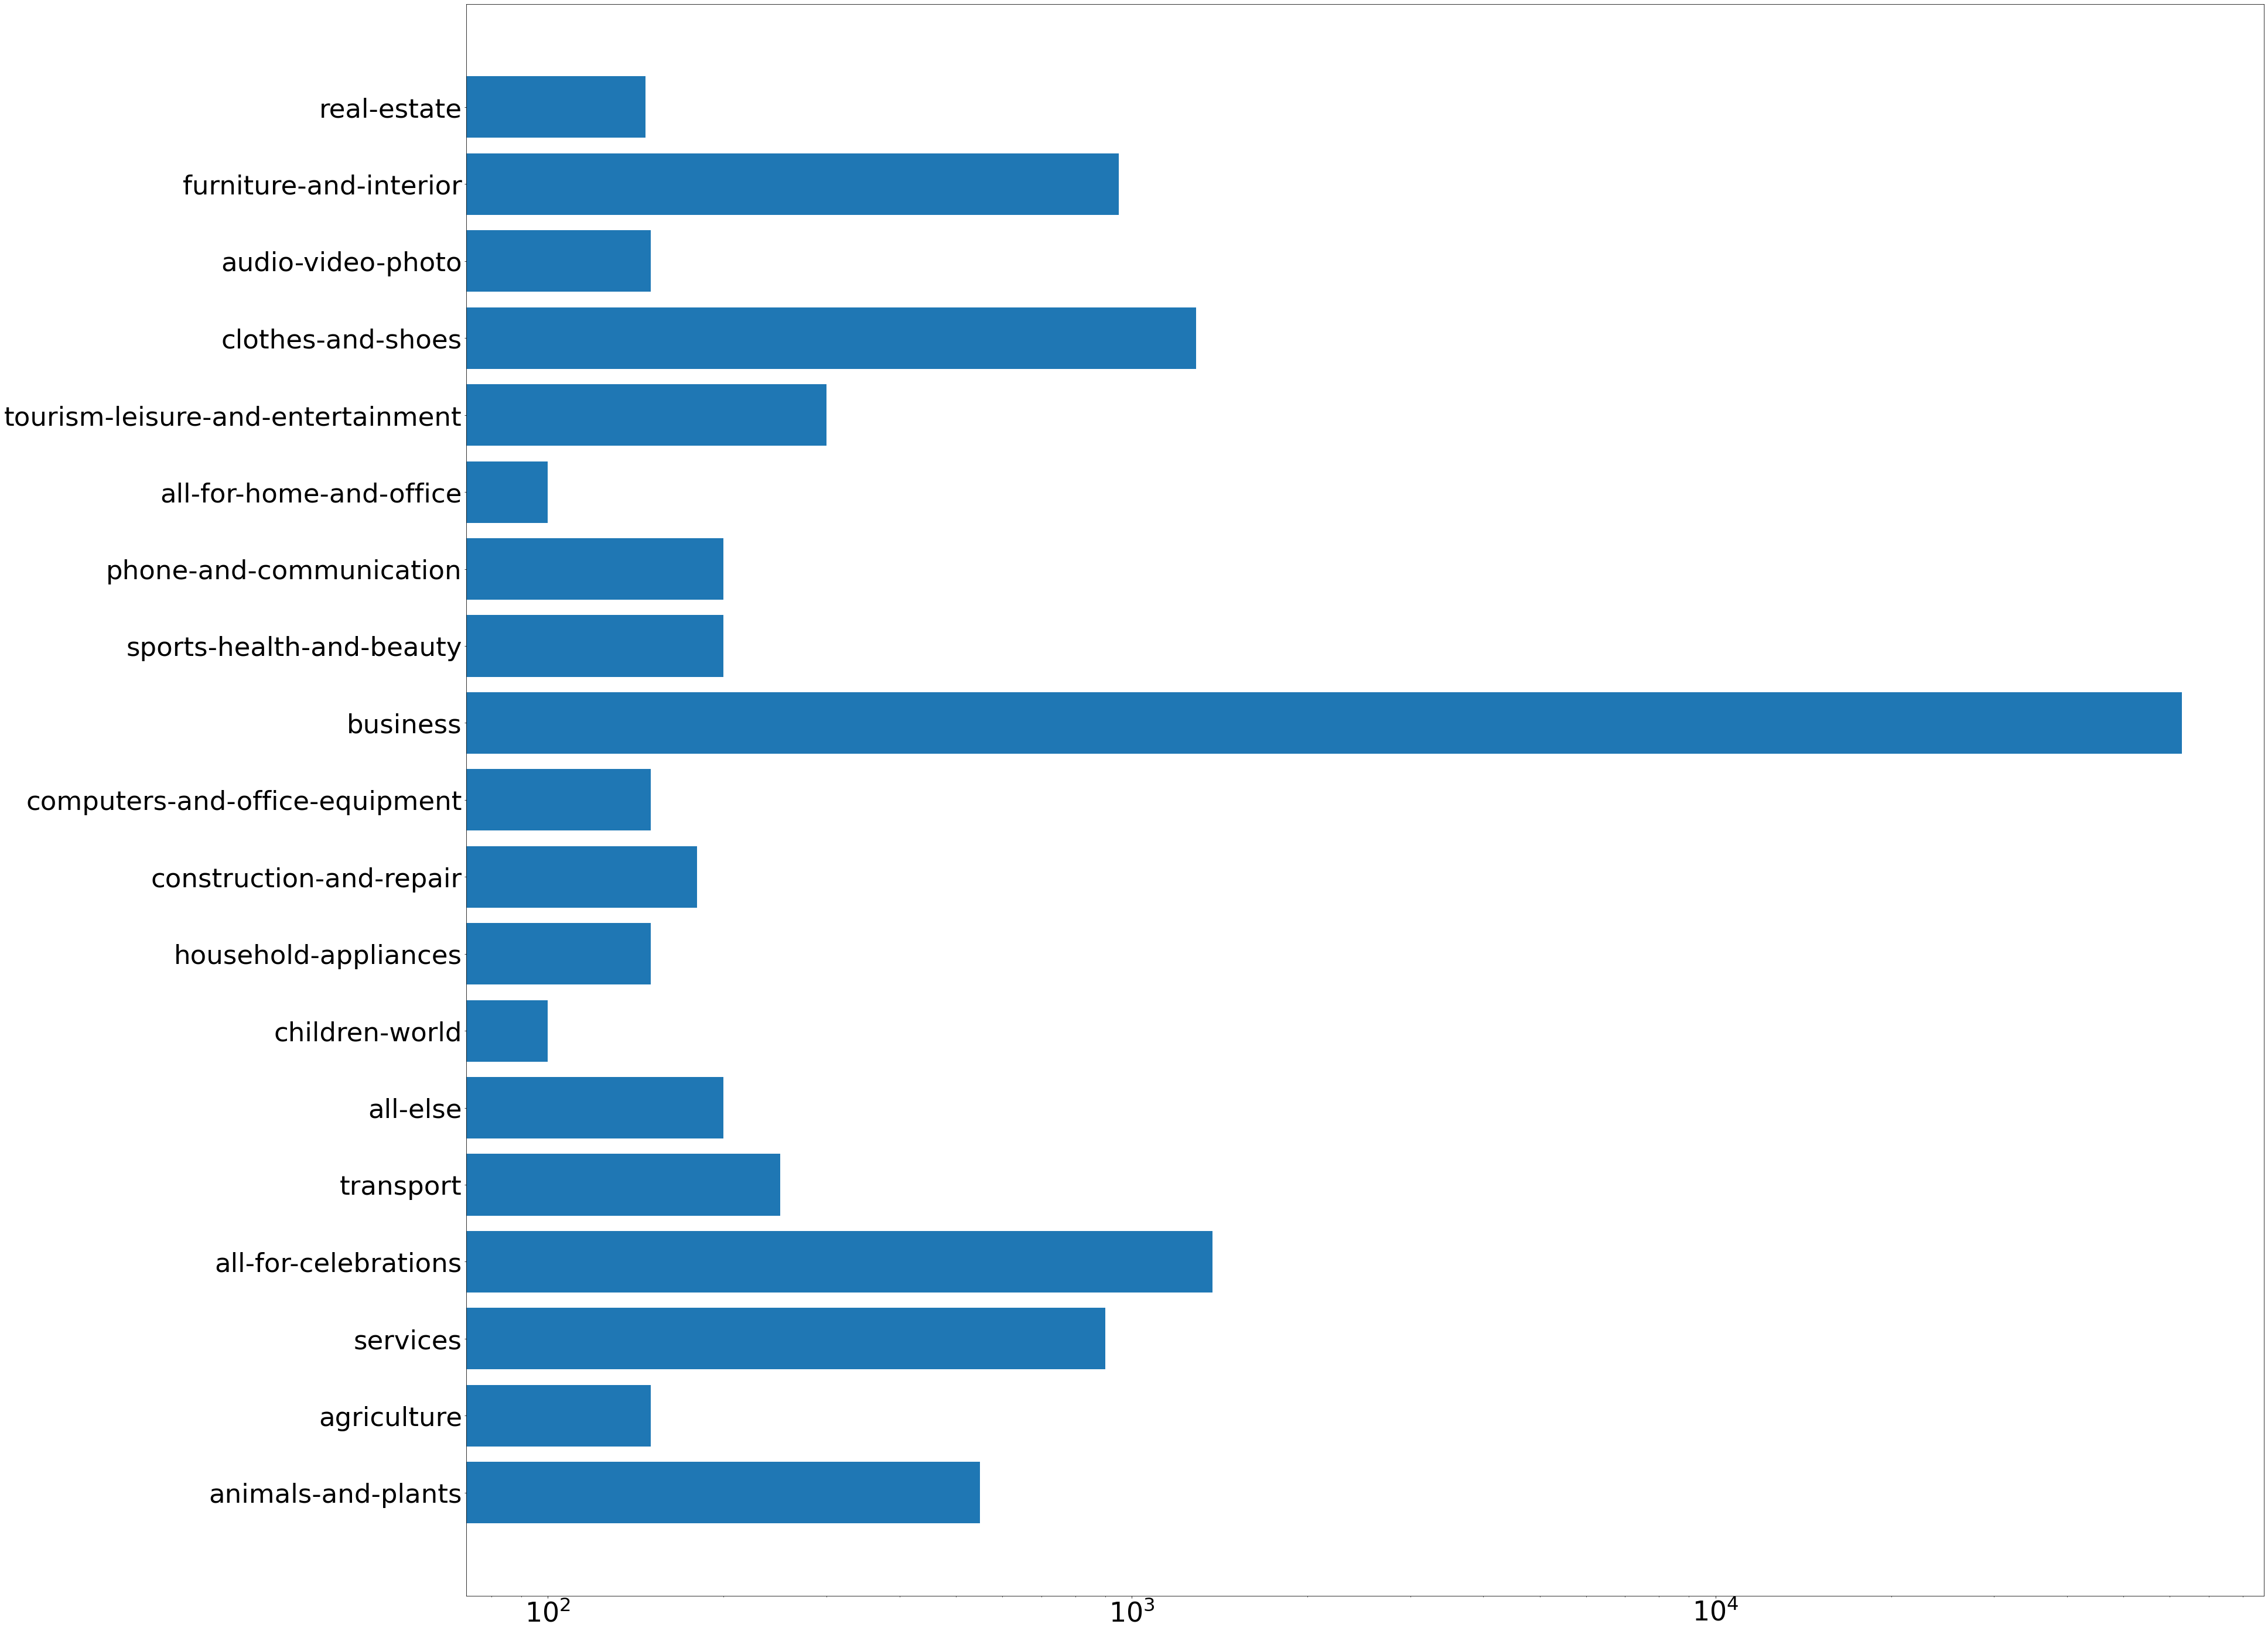

In [26]:
#What category is the most valued?
import pylab
names = list(data.keys())
values = list(data.values())
plt.figure(figsize=(55,50))
plt.xticks(fontsize=46)
plt.yticks(fontsize=45)
plt.barh(range(len(data)), values, tick_label=names)
plt.xscale('log',base=10)

plt.show()

# !!!!! axa logoritmica

In [27]:
data2 = {}
all_subcategories = df2['subcategory'].unique()
for i in range(0, 37):
    c = df2['subcategory'] == all_subcategories[i]
    x = df2[c]['priceValue'].median()
    data2[all_subcategories[i]] = x
    
del data2['missing']
data2

{'care': 200.0,
 'services': 150.0,
 'store-delivery': 100.0,
 'photo-video-services': 2835.0,
 'rent-a-car': 273.0,
 'reports-and-dissertations': 42.5,
 'cookery': 55.0,
 'education-and-child-care': 100.0,
 'other': 250.0,
 'appliance-repair': 150.0,
 'transport-for-celebrations': 1050.0,
 'courses-and-trainings': 3000.0,
 'tying': 1000.0,
 'maintenance-of-celebrations': 450.0,
 'musicians': 1300.0,
 'cargo': 150.0,
 'repairs': 126.0,
 'computer-services': 150.0,
 'insurance-services-and-consulting': 942.5,
 'accounting-and-audit-services': 1000.0,
 'leasing': 105000.0,
 'construction-work': 250.0,
 'security-and-safety': 150.0,
 'dev-support-sites': 4179.0,
 'construction-equipment': 450.0,
 'metal-2': 900.0,
 'passenger': 1680.0,
 'design-and-architecture': 147.0,
 'plumbing': 100.0,
 'electrical-2': 102.5,
 'car-2': 500.0,
 'doing-business': 47250.0,
 'advertising-services-and-development': 1050.0,
 'beauty-and-makeup': 250.0,
 'service-and-repair-of-telephones': 200.0,
 'cleaning-

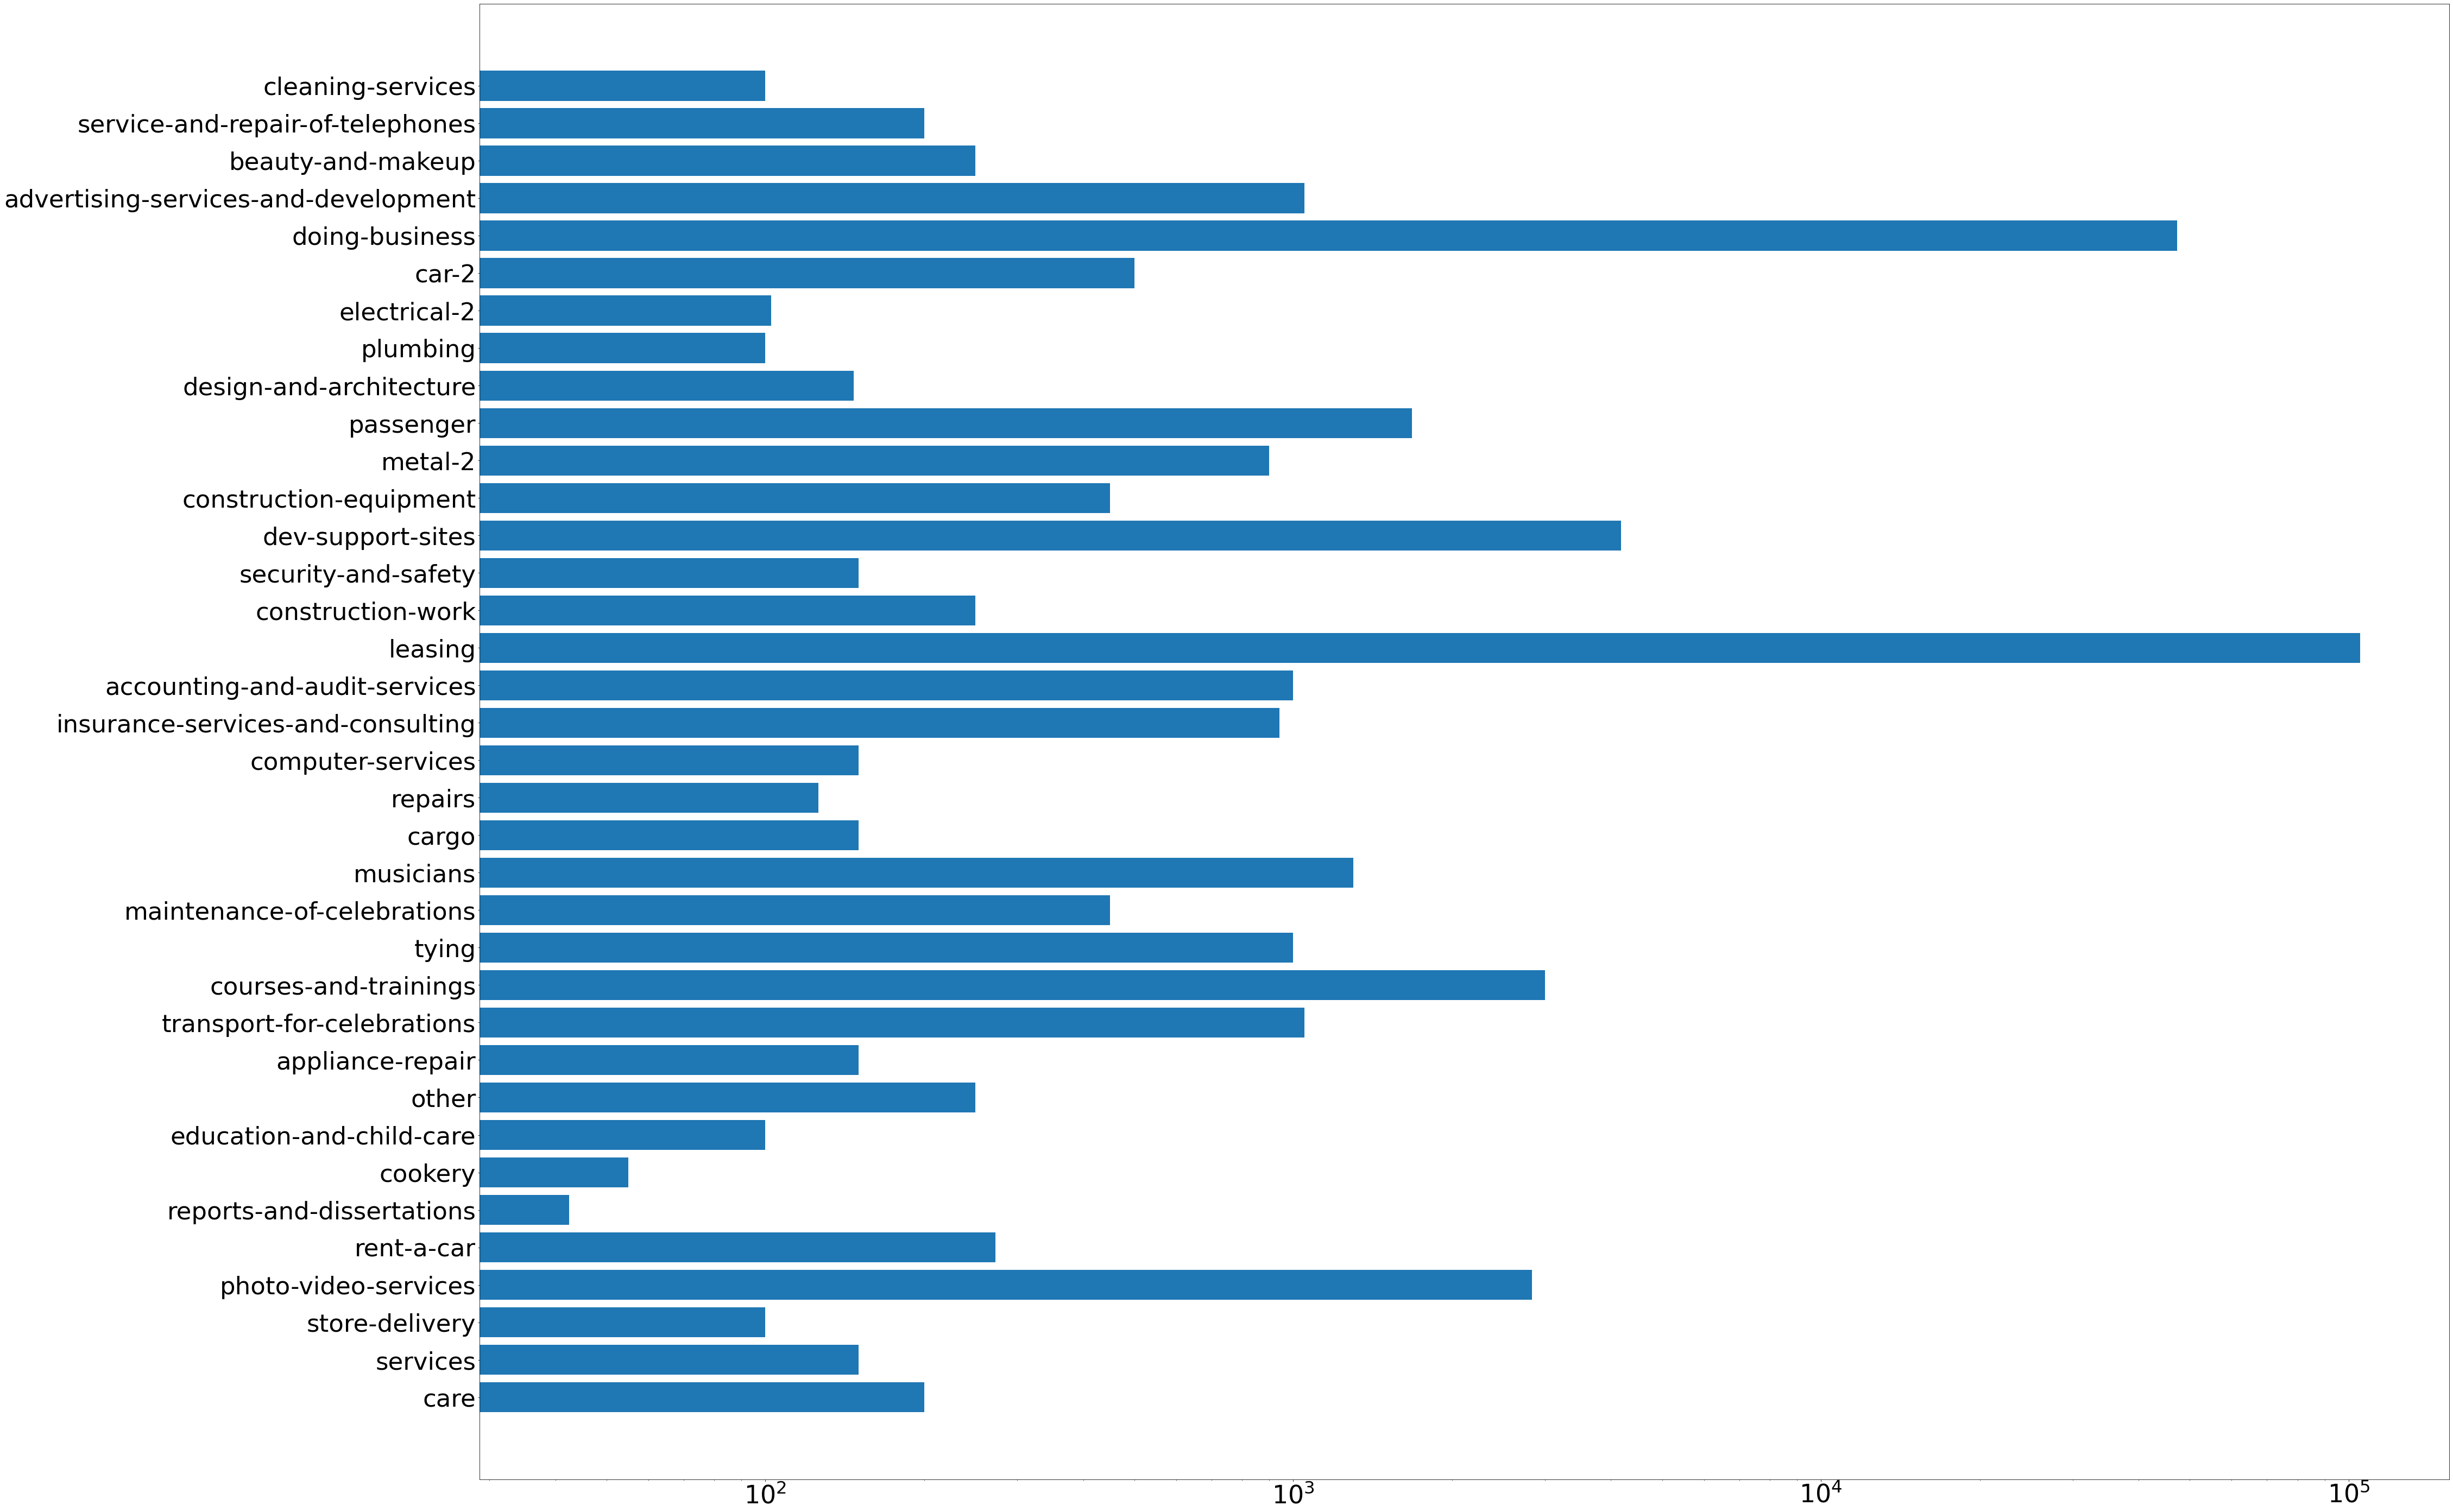

In [28]:
names = list(data2.keys())
values = list(data2.values())
plt.figure(figsize=(65,50))
plt.xticks(fontsize=46)
plt.yticks(fontsize=45)
plt.barh(range(len(data2)), values, tick_label=names)
plt.xscale('log',base=10)
plt.show()

In [177]:
data3 = {}
for i in range(0, 19):
    c = df2['category'] == all_categories[i]
    x = df2[c]['viewsAll'].median()
    data3[all_categories[i]] = x

data3

{'animals-and-plants': 1376.0,
 'agriculture': 414.0,
 'services': 272.0,
 'all-for-celebrations': 303.5,
 'transport': 280.0,
 'all-else': 471.0,
 'children-world': 235.0,
 'household-appliances': 219.5,
 'construction-and-repair': 298.0,
 'computers-and-office-equipment': 279.0,
 'business': 188.5,
 'sports-health-and-beauty': 409.0,
 'phone-and-communication': 364.0,
 'all-for-home-and-office': 265.0,
 'tourism-leisure-and-entertainment': 4452.0,
 'clothes-and-shoes': 985.0,
 'audio-video-photo': 110.0,
 'furniture-and-interior': 522.5,
 'real-estate': 4480.0}

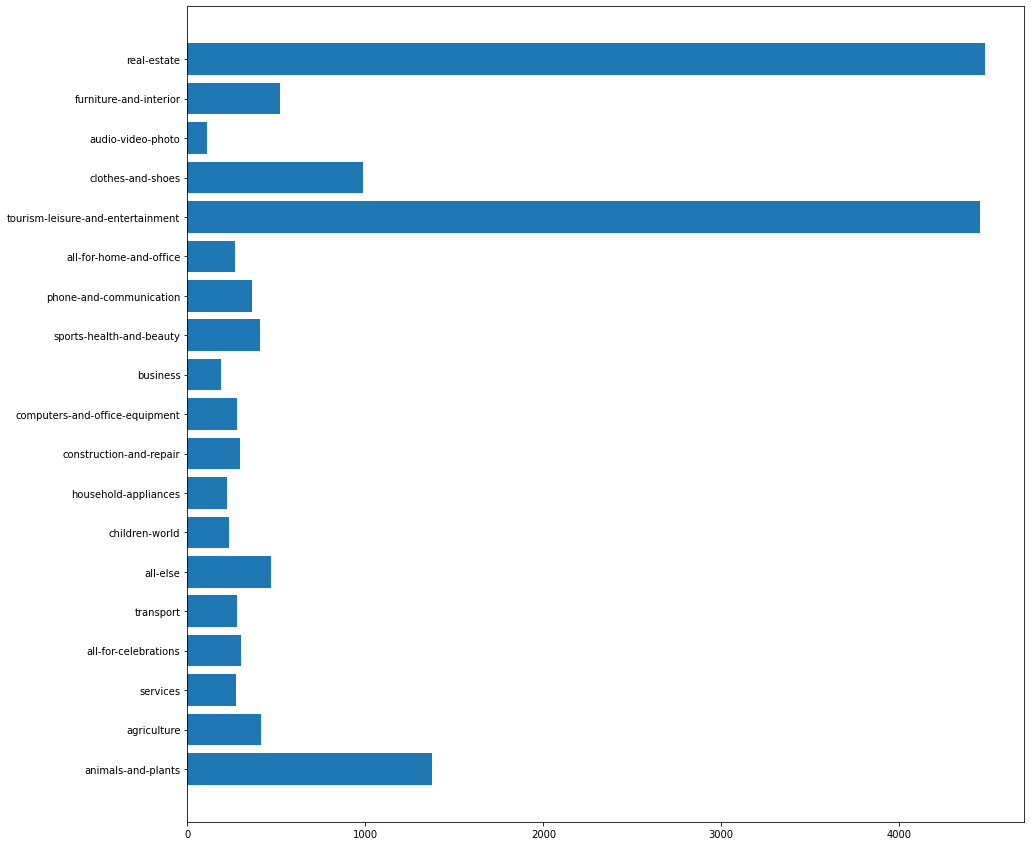

In [178]:
names = list(data3.keys())
values = list(data3.values())
plt.figure(figsize=(15,15))
plt.barh(range(len(data3)), values, tick_label=names)
plt.show()

In [179]:
data4 = {}
for i in range(0, 19):
    c = df2['category'] == all_categories[i]
    x = df2[c]['viewsToday'].median()
    data4[all_categories[i]] = x

data4

{'animals-and-plants': 3.0,
 'agriculture': 2.0,
 'services': 2.0,
 'all-for-celebrations': 2.0,
 'transport': 1.0,
 'all-else': 1.0,
 'children-world': 2.0,
 'household-appliances': 1.0,
 'construction-and-repair': 1.0,
 'computers-and-office-equipment': 1.0,
 'business': 2.0,
 'sports-health-and-beauty': 2.0,
 'phone-and-communication': 1.0,
 'all-for-home-and-office': 1.0,
 'tourism-leisure-and-entertainment': 4.0,
 'clothes-and-shoes': 2.0,
 'audio-video-photo': 1.0,
 'furniture-and-interior': 2.0,
 'real-estate': 2.0}

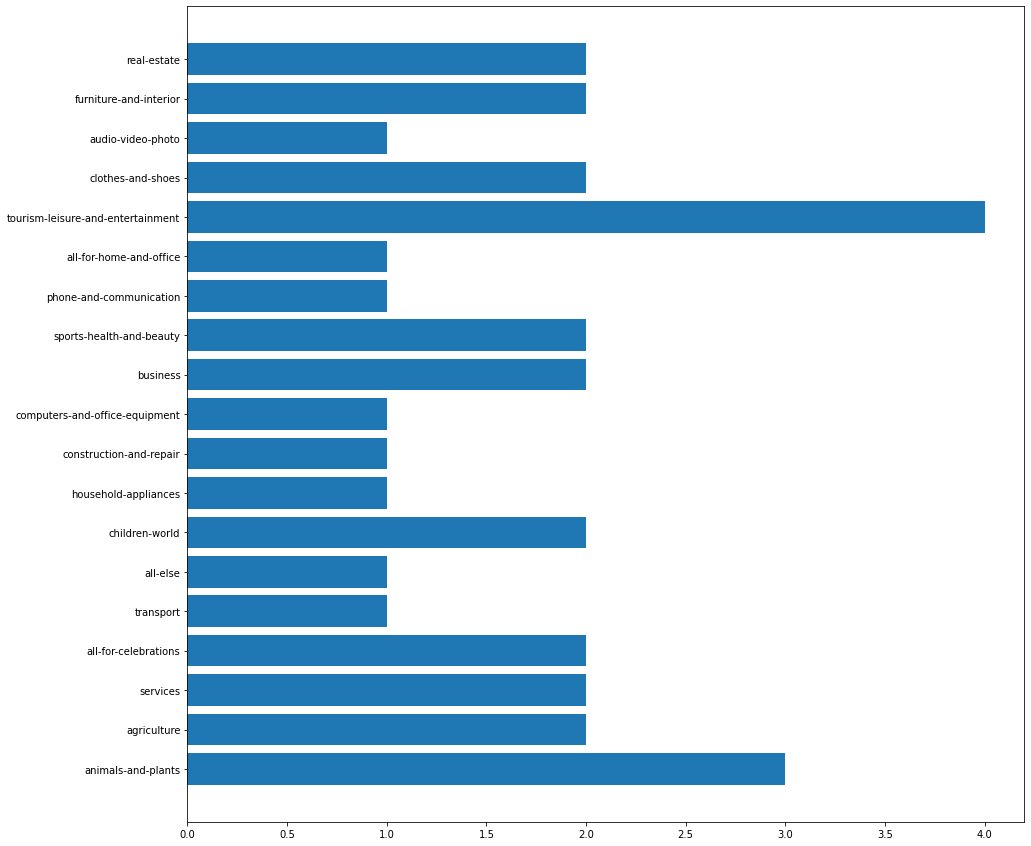

In [180]:
names = list(data4.keys())
values = list(data4.values())
plt.figure(figsize=(15,15))
plt.barh(range(len(data4)), values, tick_label=names)
plt.show()

In [184]:
data5 = {}
for i in range(0, 37):
    c = df2['subcategory'] == all_subcategories[i]
    x = df2[c]['viewsToday'].median()
    data5[all_subcategories[i]] = x
del data5['missing']
data5

{'care': 3.0,
 'services': 2.0,
 'store-delivery': 2.0,
 'photo-video-services': 1.0,
 'rent-a-car': 1.0,
 'reports-and-dissertations': 2.0,
 'cookery': 2.5,
 'education-and-child-care': 2.0,
 'other': 2.0,
 'appliance-repair': 1.0,
 'transport-for-celebrations': 2.0,
 'courses-and-trainings': 2.0,
 'tying': 3.0,
 'maintenance-of-celebrations': 1.0,
 'musicians': 2.0,
 'cargo': 1.0,
 'repairs': 1.0,
 'computer-services': 1.0,
 'insurance-services-and-consulting': 2.0,
 'accounting-and-audit-services': 2.0,
 'leasing': 2.0,
 'construction-work': 1.0,
 'security-and-safety': 1.0,
 'dev-support-sites': 1.0,
 'construction-equipment': 2.0,
 'metal-2': 2.5,
 'passenger': 1.0,
 'design-and-architecture': 2.0,
 'plumbing': 2.0,
 'electrical-2': 1.5,
 'car-2': 1.0,
 'doing-business': 2.0,
 'advertising-services-and-development': 2.0,
 'beauty-and-makeup': 2.0,
 'service-and-repair-of-telephones': 1.0,
 'cleaning-services': 1.0}

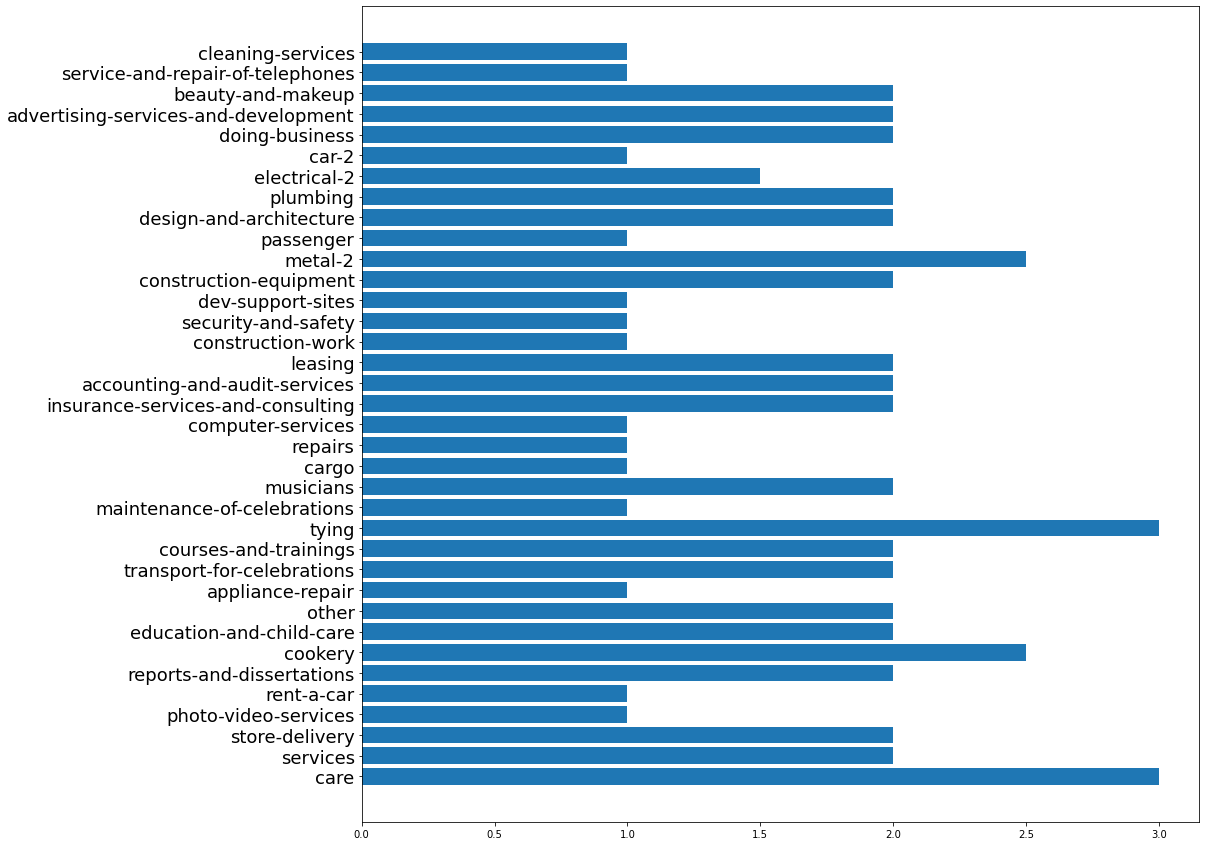

In [190]:
names = list(data5.keys())
values = list(data5.values())
plt.figure(figsize=(15,15))
plt.yticks(fontsize=18)
plt.barh(range(len(data5)), values, tick_label=names)
plt.show()

In [195]:
df2[df2['category'] == 'business']['subcategory'].value_counts()

leasing                                 1559
dev-support-sites                        317
advertising-services-and-development     310
legal-services                           135
accounting-and-audit-services             19
printing-design                           12
insurance-services-and-consulting         10
doing-business                             8
Name: subcategory, dtype: int64